In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import transforms
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

In [33]:
print(torch.__version__)
print(torchvision.__version__)

1.9.0+cpu
0.10.0+cpu


In [34]:
train_data_path = "../data/train/"
test_data_path = "../data/test/"

In [35]:
transforms = transforms.Compose([
    transforms.Resize((128,128)),
    #transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485,0.456,0.406],
                        std = [0.229, 0.224, 0.225])
])

In [36]:
train_data = torchvision.datasets.ImageFolder(root=train_data_path, transform=transforms)
test_data = torchvision.datasets.ImageFolder(root=test_data_path, transform=transforms)

In [37]:
print("Num Images in Train Dataset:", len(train_data))
print("Num Images in Test Dataset:", len(test_data))

Num Images in Train Dataset: 3416
Num Images in Test Dataset: 373


In [38]:
batch_size=16
train_data_loader = data.DataLoader(train_data, batch_size=batch_size,num_workers=8)
test_data_loader = data.DataLoader(test_data, batch_size=batch_size,num_workers=8)

In [39]:
batch = next(iter(train_data_loader))

In [40]:
len(batch)

2

In [41]:
images, labels = batch

In [42]:
images.shape

torch.Size([16, 3, 128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])


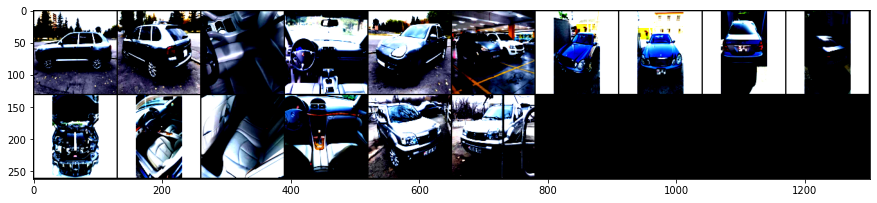

In [43]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print("Labels:", labels)

In [44]:
grid.shape

torch.Size([3, 262, 1302])

In [45]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*29*29, out_features=84)
        self.fc2 = nn.Linear(in_features=84, out_features=50)
        self.fc3 = nn.Linear(in_features=50, out_features=16)
    def forward(self, x):
        # (1) input layer
        x = x
        
        # (2) hidden conv layer
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        # (3) hidden conv layer
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        x = x.reshape(-1, 12*29*29)
        x = self.fc1(x)
        x = F.relu(x)

        # (5) hidden linear layer
        x = self.fc2(x)
        x = F.relu(x)
        
        # (6) output layer
        x = self.fc3(x)
        # x = F.softmax(x, dim=1)
        return x
network = Net()

In [46]:
sample = next(iter(train_data))

In [47]:
image,label = sample
image.shape

torch.Size([3, 128, 128])

In [48]:
image.unsqueeze(0).shape

torch.Size([1, 3, 128, 128])

In [49]:
pred = network(image.unsqueeze(0))

In [50]:
pred.shape

torch.Size([1, 16])

In [51]:
pred.argmax(dim=1)

tensor([8])

In [52]:
batch = next(iter(train_data_loader))

In [53]:
images,labels = batch

**Calculating the loss**

In [54]:
preds = network(images)

In [55]:
loss = F.cross_entropy(preds,labels)
loss.item()

2.763719320297241

**Calculating gradients**

In [56]:
print(network.conv1.weight.grad)

None


In [57]:
loss.backward()  # Calculating gradients

In [58]:
network.conv1.weight.grad.shape

torch.Size([6, 3, 5, 5])

**Updating the Weights**

In [59]:
optimizer = optim.Adam(network.parameters(), lr=0.001)

In [60]:
loss.item()

2.763719320297241

In [61]:
def get_num_correct(preds,labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [62]:
for epoch in range(5):
    total_loss = 0
    total_correct = 0
    for batch in train_data_loader:
        images,labels = batch

        preds = network(images)
        loss = F.cross_entropy(preds,labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss+=loss.item()
        total_correct+=get_num_correct(preds, labels)
    print("epoch:", epoch, "total_correct:", total_correct, "loss:", total_loss)


epoch: 0 total_correct: 1125 loss: 677.7952375565768
epoch: 1 total_correct: 1083 loss: 505.2640466792145
epoch: 2 total_correct: 736 loss: 523.1986213922501
epoch: 3 total_correct: 684 loss: 446.4648405313492
epoch: 4 total_correct: 683 loss: 437.15051877498627


In [121]:
get_num_correct(preds,labels)

0

In [122]:
optimizer.step() # updating the weights

In [123]:
preds = network(images)
loss = F.cross_entropy(preds,labels)

In [124]:
loss.item()

1.9466632604599

In [125]:
get_num_correct(preds,labels)

14

In [126]:
preds.shape

torch.Size([16, 16])

In [127]:
preds

tensor([[ 9.2746e-01, -6.8326e-01, -4.2325e-01, -9.0270e-01, -3.9655e-01,
         -5.0966e-01, -1.8908e-01, -1.4670e-01,  1.1537e-01, -1.9377e-01,
         -7.4116e-02,  6.6230e-03, -6.8839e-01,  2.3976e-01, -1.9233e-01,
          3.3521e-01],
        [ 8.8959e-01, -6.8917e-01, -4.7583e-01, -8.9295e-01, -4.3723e-01,
         -5.0842e-01, -2.3032e-01, -1.1008e-01,  1.4055e-01, -2.2874e-01,
         -7.3379e-02,  7.5393e-03, -7.0760e-01,  2.5344e-01, -1.9101e-01,
          3.2637e-01],
        [ 4.0985e-01, -3.5982e-01, -2.6122e-01, -5.5327e-01, -2.4625e-01,
         -3.3286e-01, -1.7470e-01, -9.5190e-02,  1.2147e-01, -1.0824e-01,
         -2.0187e-02,  2.7215e-02, -4.3463e-01,  1.6637e-01, -1.5663e-01,
          1.6294e-01],
        [ 8.5282e-01, -6.5725e-01, -4.4250e-01, -8.7684e-01, -3.9382e-01,
         -4.6807e-01, -2.2272e-01, -1.2096e-01,  1.3861e-01, -2.0344e-01,
         -7.0880e-02,  1.7137e-02, -6.5833e-01,  2.4758e-01, -1.7682e-01,
          2.9629e-01],
        [ 1.2376e+00

In [160]:
preds.argmax(dim=1)

tensor([2, 2, 2, 2, 2, 2, 2, 2])

In [161]:
preds.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False, False, False, False])

In [162]:
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)

In [163]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [164]:
def train(model, device, train_loader, optimizer, epoch, steps_per_epoch=20):
  # Switch model to training mode. This is necessary for layers like dropout, batchnorm etc which behave differently in training and evaluation mode
  model.train()
  train_total = 0
  train_correct = 0

  # We loop over the data iterator, and feed the inputs to the network and adjust the weights.
  for batch_idx, (data, target) in enumerate(train_loader, start=0):
    if batch_idx > steps_per_epoch:
      break
    # Load the input features and labels from the training dataset
    data, target = data.to(device), target.to(device)
    
    # Reset the gradients to 0 for all learnable weight parameters
    optimizer.zero_grad()
    
    # Forward pass: Pass image data from training dataset, make predictions about class image belongs to (0-9 in this case)
    output = model(data)
    
    # Define our loss function, and compute the loss
    loss = F.nll_loss(output, target)

    scores, predictions = torch.max(output.data, 1)
    train_total += target.size(0)
    train_correct += int(sum(predictions == target))
            
    # Backward pass: compute the gradients of the loss w.r.t. the model's parameters
    loss.backward()
    
    # Update the neural network weights
    optimizer.step()

  acc = round((train_correct / train_total) * 100, 2)
  print('Epoch [{}], Loss: {}, Accuracy: {}'.format(epoch, loss.item(), acc), end='')
  wandb.log({'Train Loss': loss.item(), 'Train Accuracy': acc})

In [165]:
for epoch in range(10):
  train(simplenet, device, train_data_loader, optimizer, epoch)

Epoch [0], Loss: -5073.04638671875, Accuracy: 83.93

NameError: name 'wandb' is not defined